## COVID-19 DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("D:/STUDIES/DATA TRAINED/DATASETS/DSData-master/aggregate_covid_country.csv")
df.head(10)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [4]:
df.shape

(23688, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


1. Maximum Deaths in a day in a country - 98,913
2. Maximum Recovered Cases in a day in a country - 3,84,902
3. Maximum Confirmed Cases in a day in a country - 16,80,913

In [7]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [8]:
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']

In [9]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [10]:
df_grp = pd.DataFrame(df[["Country","Confirmed","Recovered","Deaths","Active"]].groupby('Country').sum())
df_grp.reset_index(level=0, inplace=True)
df_grp

,Country,Confirmed,Recovered,Deaths,Active
0,Afghanistan,185236,20845,4669,159722
1,Albania,41253,25688,1629,13936
2,Algeria,240070,107345,23232,109493
3,Andorra,41573,20751,2219,18603
4,Angola,1892,506,131,1255
...,...,...,...,...,...
183,West Bank and Gaza,19971,8798,113,11060
184,Western Sahara,307,186,1,120
185,Yemen,2696,92,460,2144
186,Zambia,15285,5281,215,9789


In [11]:
df_grp.describe()

,Confirmed,Recovered,Deaths,Active
count,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02
mean,1.004140e+06,3.253070e+05,6.639381e+04,6.124395e+05
std,4.567753e+06,1.121162e+06,3.088152e+05,3.452707e+06
min,1.900000e+01,0.000000e+00,0.000000e+00,1.900000e+01
25%,7.594250e+03,2.169500e+03,1.582500e+02,4.629250e+03
50%,4.642850e+04,1.776400e+04,8.435000e+02,2.802350e+04
75%,3.891915e+05,1.076598e+05,8.738750e+03,2.323178e+05
max,5.709877e+07,8.428678e+06,3.221969e+06,4.544812e+07


#### MOST AFFECTED COUNTRIES

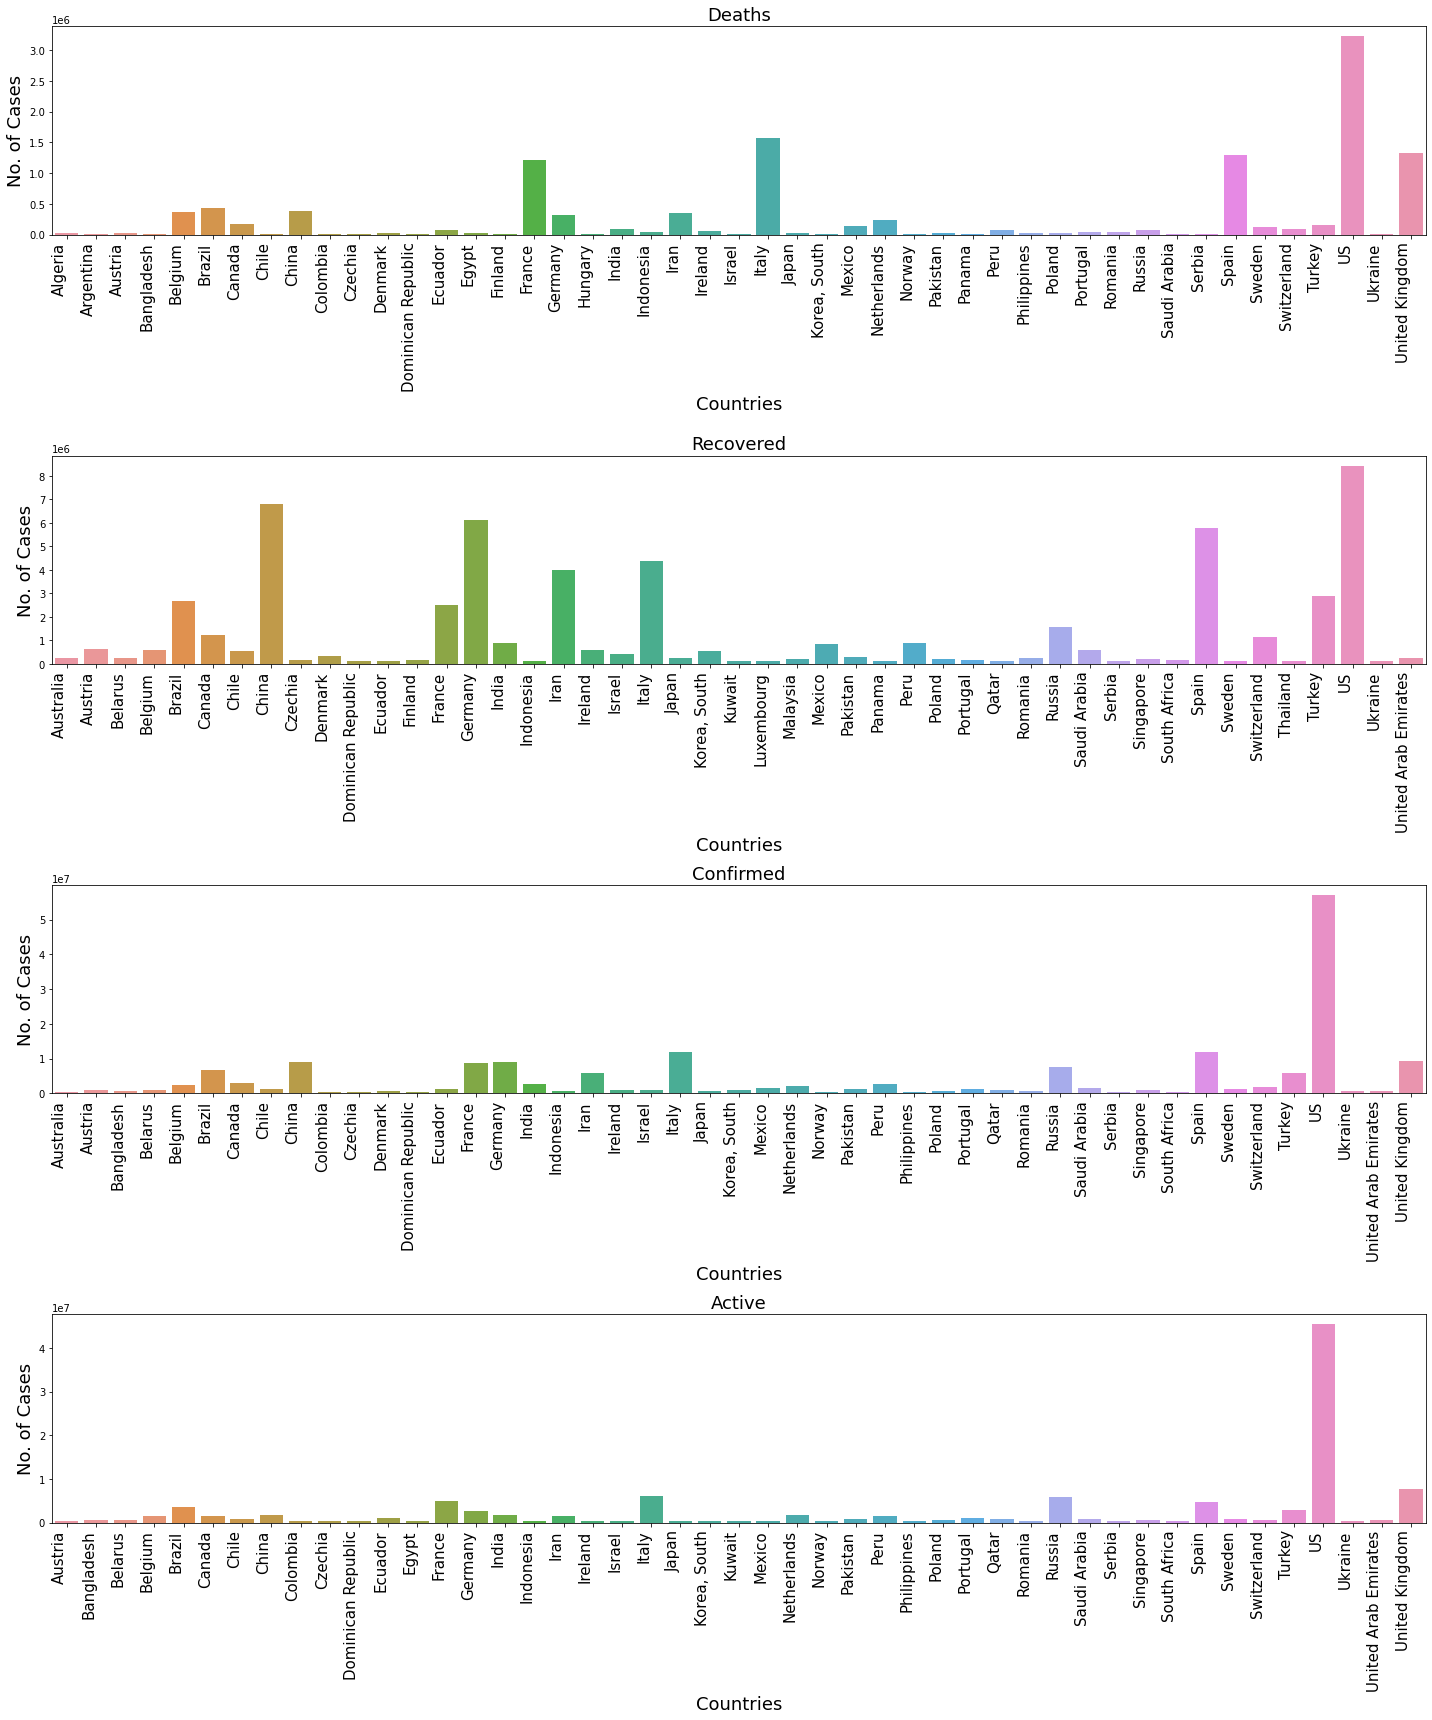

In [12]:
plt.figure(figsize=(20,24))
b = {'Deaths':8800,'Recovered':107700,'Confirmed':389200, 'Active':232400} #more than 75 percentile
j=0
for i in b:
    j+=1
    y_values = list(df_grp[df_grp[i]>b[i]][i])
    
    plt.subplot(4,1,j)
    ax = sns.barplot(x = df_grp[df_grp[i]>b[i]]['Country'], y = y_values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15)
    ax.set_xlabel('Countries',fontsize=18) 
    ax.set_ylabel('No. of Cases',fontsize=18)
    ax.set_title (i,fontsize=18)
#     plt.plot(x_values,y_values)
    plt.tight_layout()

* Most Affected Countries as of 26/05/2020 : 
US, Spain, UK, Italy
* Among these United Kingdom has the least recovered cases

In [13]:
df_grp1 = pd.DataFrame(df[["Date","Confirmed","Recovered","Deaths","Active"]].groupby('Date').sum())
# df_grp1.reset_index(level=0, inplace=True)
df_grp1

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-22,555,28,17,510
2020-01-23,654,30,18,606
2020-01-24,941,36,26,879
2020-01-25,1434,39,42,1353
2020-01-26,2118,52,56,2010
...,...,...,...,...
2020-05-22,5210817,2056643,338160,2816014
2020-05-23,5310362,2112185,342097,2856080
2020-05-24,5407613,2168563,345059,2893991


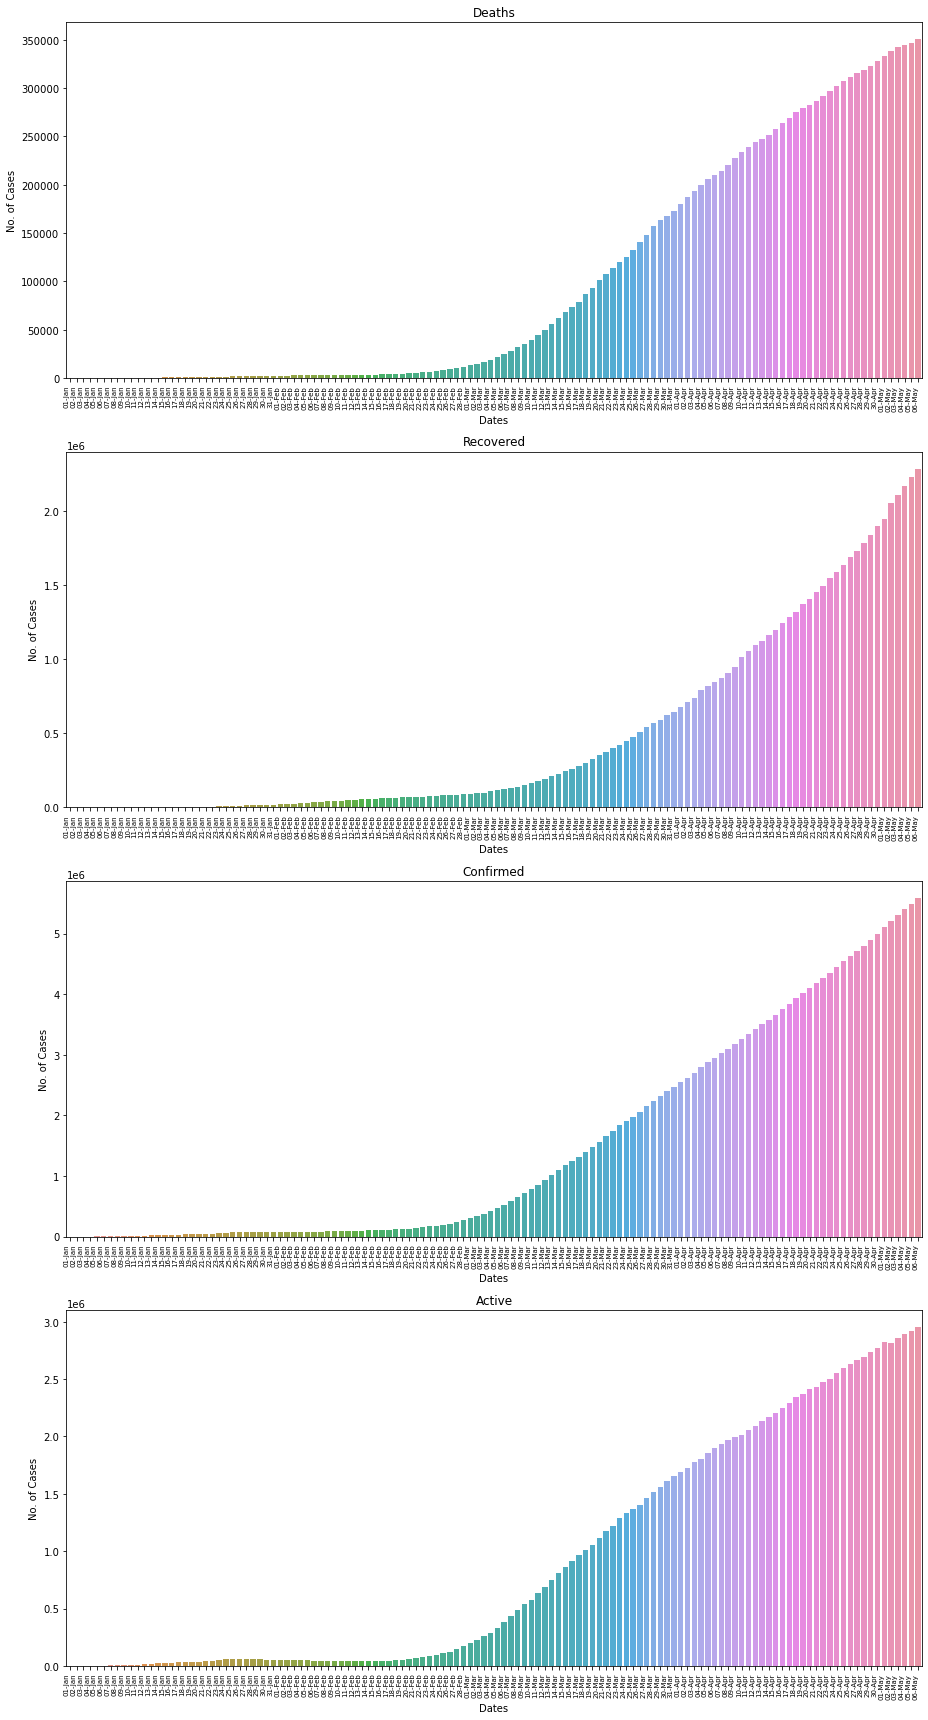

In [14]:
import datetime
import matplotlib.dates as mdates
plt.figure(figsize=(13,24))
# a = list(df_grp1['Date'])
x_values = list(df_grp1.index)
# [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in a]
b = ['Deaths','Recovered','Confirmed','Active']
for i in range(len(b)):
    y_values = list(df_grp1[b[i]])
    plt.subplot(4,1,i+1)
#     ax = sns.barplot(x = x_values, y = y_values)
    ax = sns.barplot(x = df_grp1.index, y = y_values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=7)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.set(xlabel='Dates', ylabel='No. of Cases',title = b[i])
#     plt.plot(x_values,y_values)
    plt.tight_layout()

Cases in the World have exponentially increased

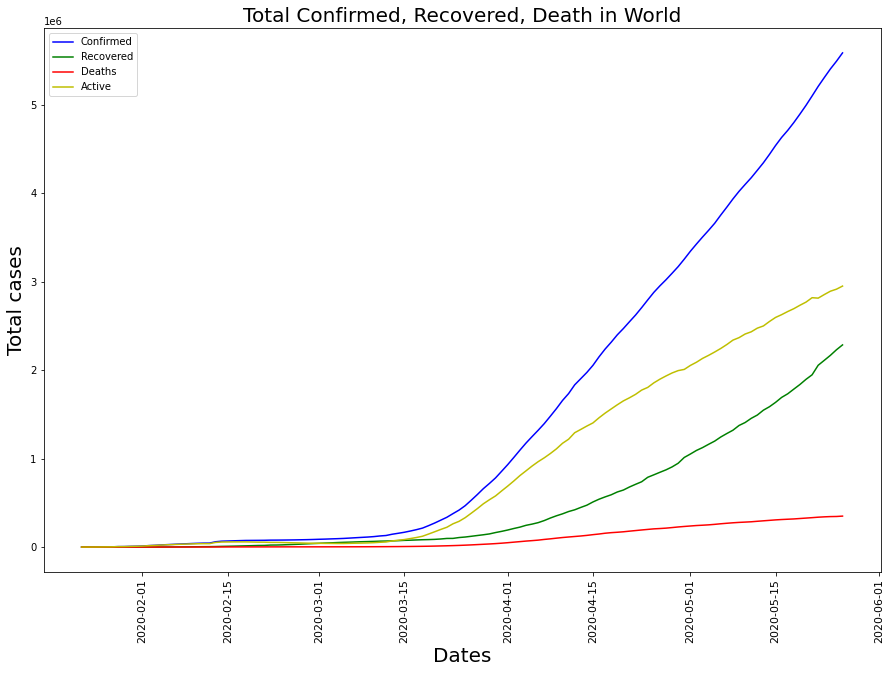

In [15]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Recovered, Death in World" , fontsize = 20)
y_values={}
for i in range(len(b)):
    y_values[b[i]] = list(df_grp1[b[i]])
ax1 = sns.lineplot(y= y_values['Confirmed'],x= x_values,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = sns.lineplot(y= y_values['Recovered'],x= x_values,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = sns.lineplot(y= y_values['Deaths'],x= x_values,label = 'Deaths',linestyle ='-',color = 'r')
ax4 = sns.lineplot(y= y_values['Active'],x= x_values,label = 'Active',linestyle ='-',color = 'y')
plt.legend()

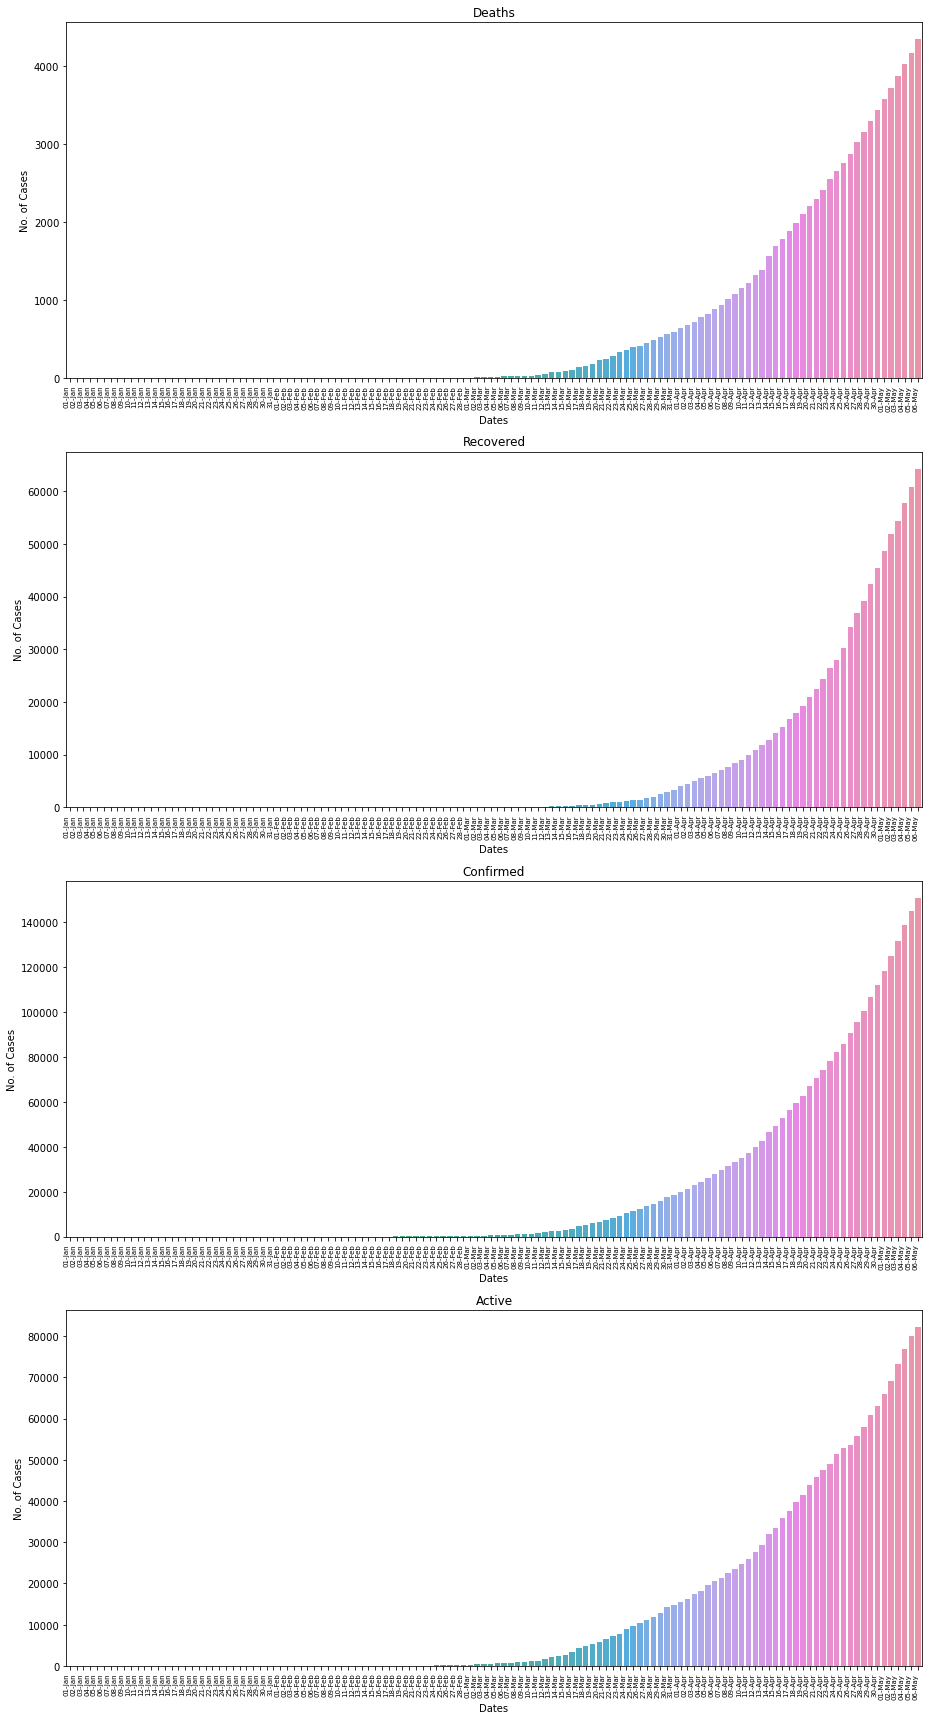

In [16]:
df_india = df[df['Country']=='India']
plt.figure(figsize=(13,24))
for i in range(len(b)):
    y_values = list(df_india[b[i]])
    plt.subplot(4,1,i+1)
    ax = sns.barplot(x = x_values, y = y_values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=7)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.set(xlabel='Dates', ylabel='No. of Cases',title = b[i])
    plt.tight_layout()
# len(x_values)

India started seeing a spike in the cases after mid march

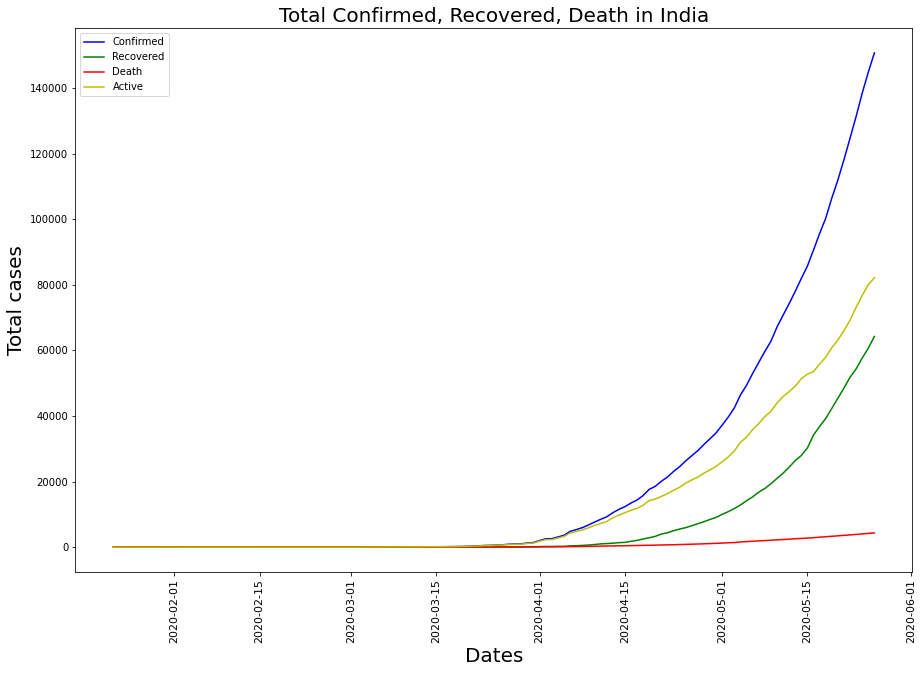

In [17]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Recovered, Death in India" , fontsize = 20)
y_values={}
for i in range(len(b)):
    y_values[b[i]] = list(df_india[b[i]])
ax1 = sns.lineplot(y= y_values['Confirmed'],x= x_values,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = sns.lineplot(y= y_values['Recovered'],x= x_values,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = sns.lineplot(y= y_values['Deaths'],x= x_values,label = 'Death',linestyle ='-',color = 'r')
ax4 = sns.lineplot(y= y_values['Active'],x= x_values,label = 'Active',linestyle ='-',color = 'y')
plt.legend()

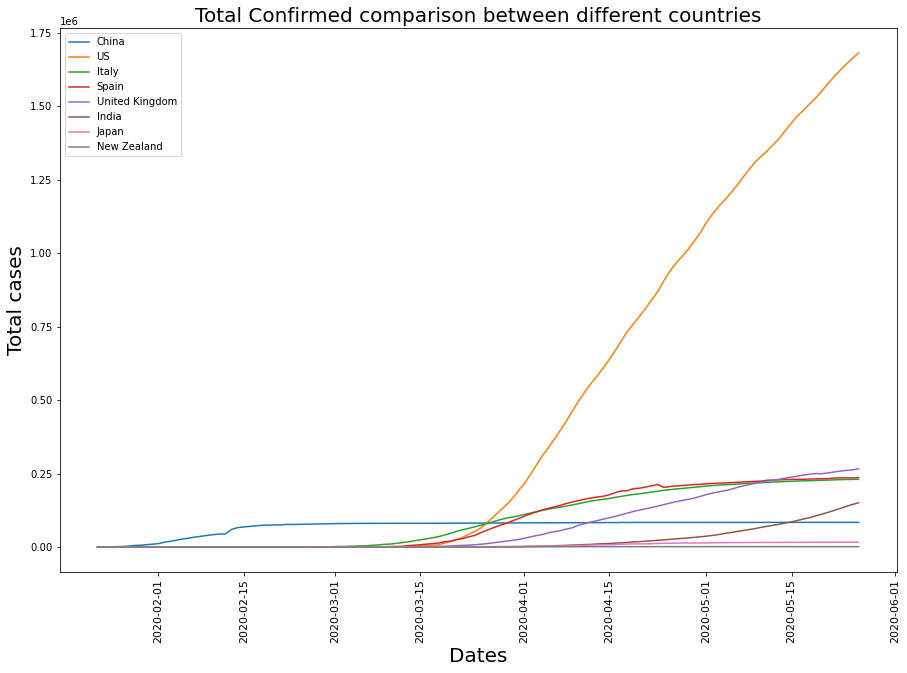

In [18]:
countries = ['China','US', 'Italy', 'Spain', 'United Kingdom','India','Japan','New Zealand']
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed comparison between different countries" , fontsize = 20)
y_values={}
for i in range(len(countries)):
    y_values[countries[i]] = list(df[df['Country']==countries[i]]['Confirmed'])
    
for i in range(len(countries)):
    sns.lineplot(y= y_values[countries[i]],x= x_values,label = countries[i],linestyle ='-')
plt.legend()

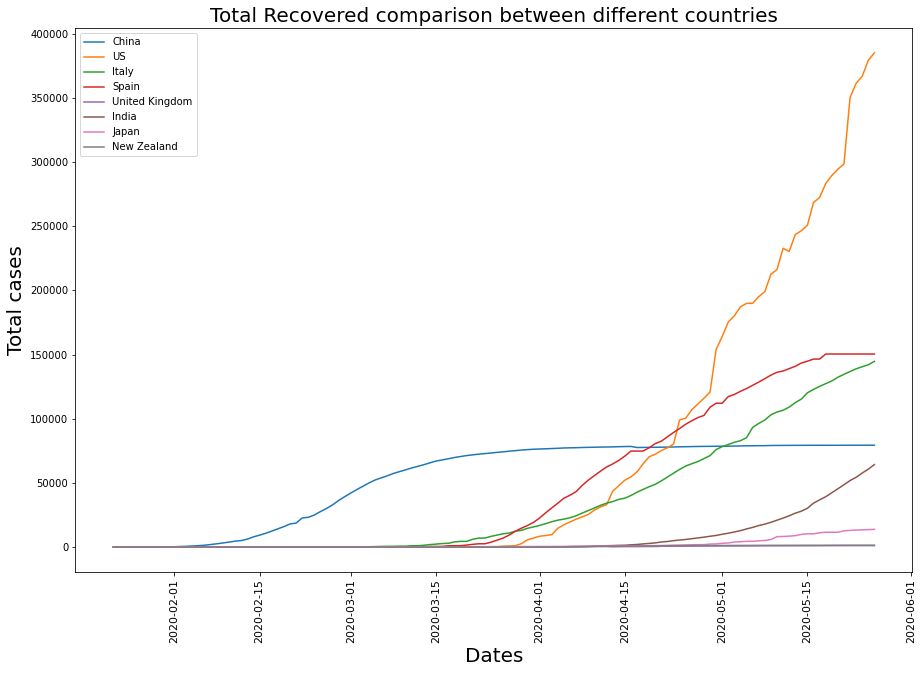

In [19]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Recovered comparison between different countries" , fontsize = 20)
y_values={}
for i in range(len(countries)):
    y_values[countries[i]] = list(df[df['Country']==countries[i]]['Recovered'])
    
for i in range(len(countries)):
    sns.lineplot(y= y_values[countries[i]],x= x_values,label = countries[i],linestyle ='-')
plt.legend()

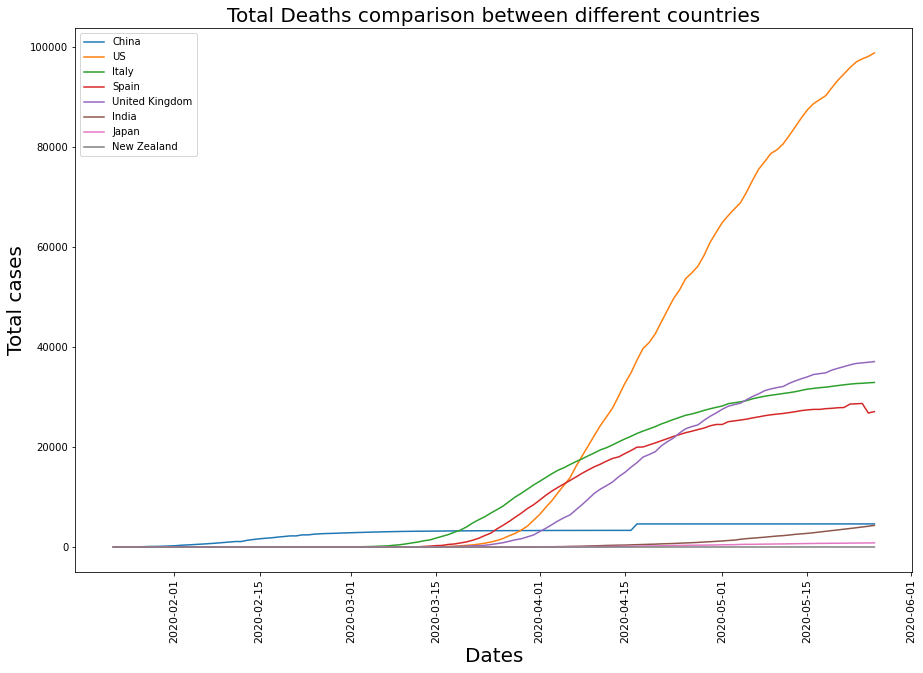

In [20]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Deaths comparison between different countries" , fontsize = 20)
y_values={}
for i in range(len(countries)):
    y_values[countries[i]] = list(df[df['Country']==countries[i]]['Deaths'])
    
for i in range(len(countries)):
    sns.lineplot(y= y_values[countries[i]],x= x_values,label = countries[i],linestyle ='-')
plt.legend()

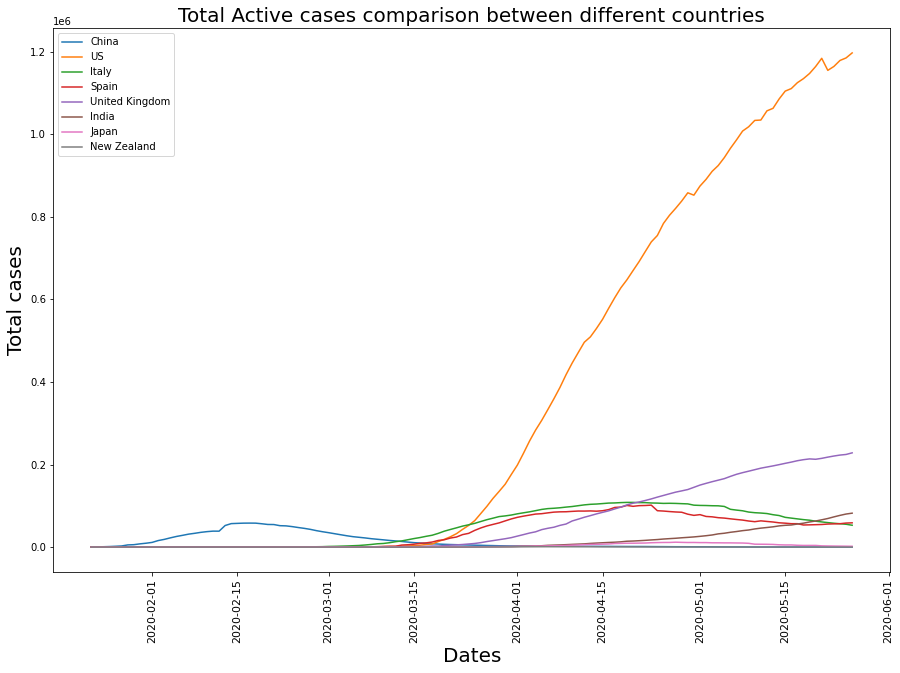

In [21]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Active cases comparison between different countries" , fontsize = 20)
y_values={}
for i in range(len(countries)):
    y_values[countries[i]] = list(df[df['Country']==countries[i]]['Active'])
    
for i in range(len(countries)):
    sns.lineplot(y= y_values[countries[i]],x= x_values,label = countries[i],linestyle ='-')
plt.legend()

### United States is the coutry which is worst hit by COVID -19.